In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('monthly-sunspots.csv',parse_dates=['Month'])
df.head()

,Month,Sunspots
0,1749-01-01,58.0
1,1749-02-01,62.6
2,1749-03-01,70.0
3,1749-04-01,55.7
4,1749-05-01,85.0


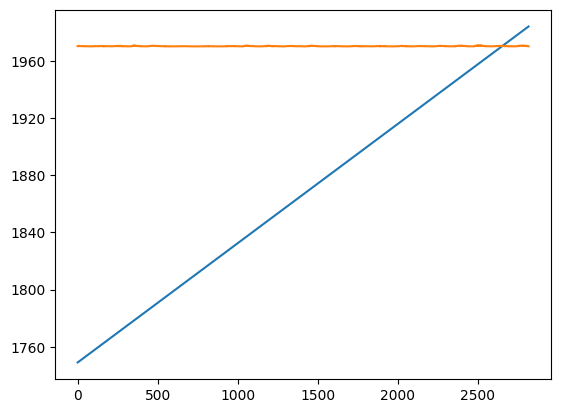

In [4]:
plt.plot(df)

In [5]:
df.describe()

,Month,Sunspots
count,2820,2820.000000
mean,1866-06-16 10:38:17.872340992,51.265957
min,1749-01-01 00:00:00,0.000000
25%,1807-09-23 12:00:00,15.700000
50%,1866-06-16 00:00:00,42.000000
75%,1925-03-08 18:00:00,74.925000
max,1983-12-01 00:00:00,253.800000
std,NaN,43.448971


<Axes: xlabel='Month'>

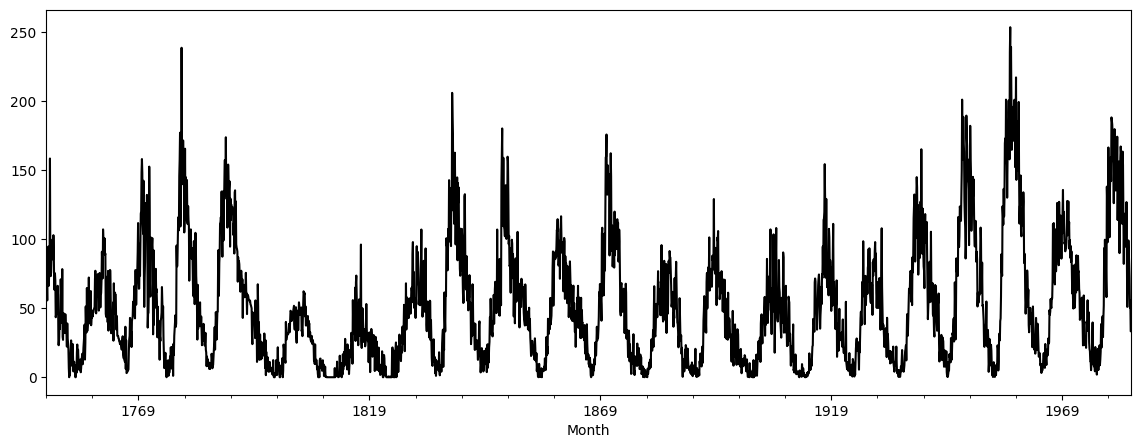

In [15]:
df['Month']=pd.to_datetime(df['Month'])
data_new=df.set_index(df['Month'])
data_new1=data_new.drop(labels=['Month'],axis=1)
fig=plt.figure(figsize=(14,5))
data_new1['Sunspots'].plot(style='k')

In [8]:
data_q=data_new1.resample('q').mean()
data_q.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_4340\735669377.py:1: FutureWarning: 'q' is deprecated and will be removed in a future version, please use 'QE' instead.
  data_q=data_new1.resample('q').mean()


,Sunspots
Month,
1749-03-31,63.533333
1749-06-30,74.733333
1749-09-30,79.000000
1749-12-31,106.433333
1750-03-31,79.466667


In [10]:
def adfuller_test(data):
    result=adfuller(data)
    labels=['ADF Test Statistics','p-value','Lags Used','Number of observations used']
    for value,label in zip(result,labels):
        print(label+":"+str(value))
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has not unit root and is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary")

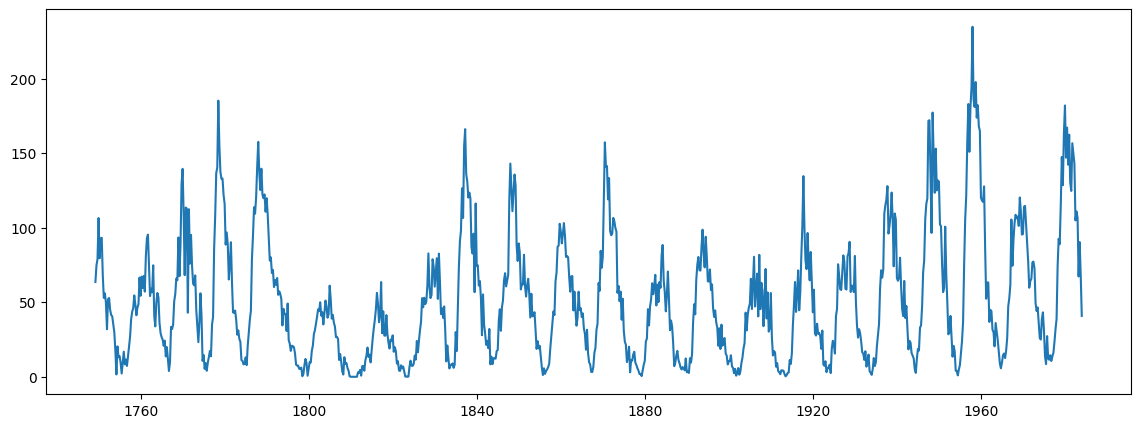

In [12]:
plt.figure(figsize=(14,5))
plt.plot(data_q)

<Axes: xlabel='Month'>

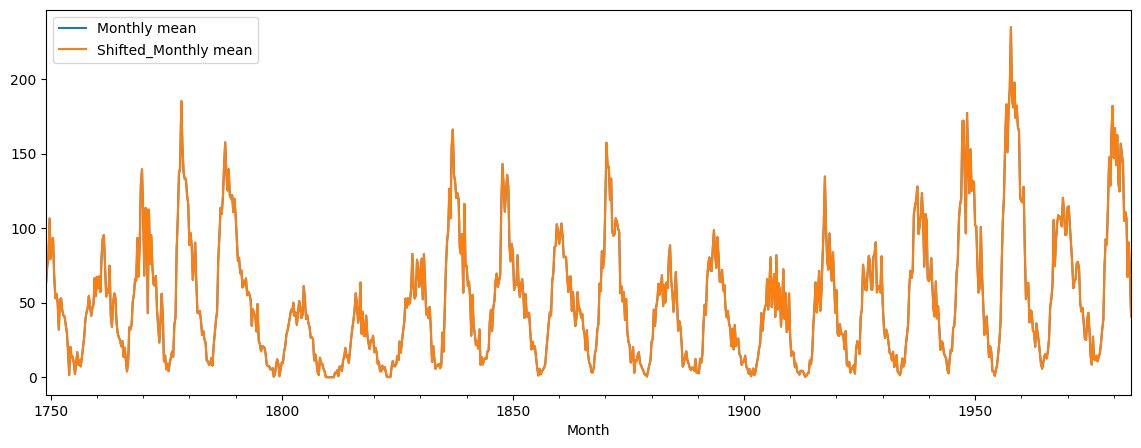

In [22]:
base_data=data_q.copy()
base_data['Monthly mean']=base_data['Sunspots']
base_data['Shifted_Monthly mean']=base_data['Sunspots']
base_data[['Monthly mean','Shifted_Monthly mean']].plot(figsize=(14,5))

In [26]:
base_data=base_data.dropna()
from sklearn.metrics import mean_squared_error
print('Mean Squared Error:'+str(mean_squared_error(base_data['Monthly mean'],base_data['Shifted_Monthly mean'])))

Mean Squared Error:0.0


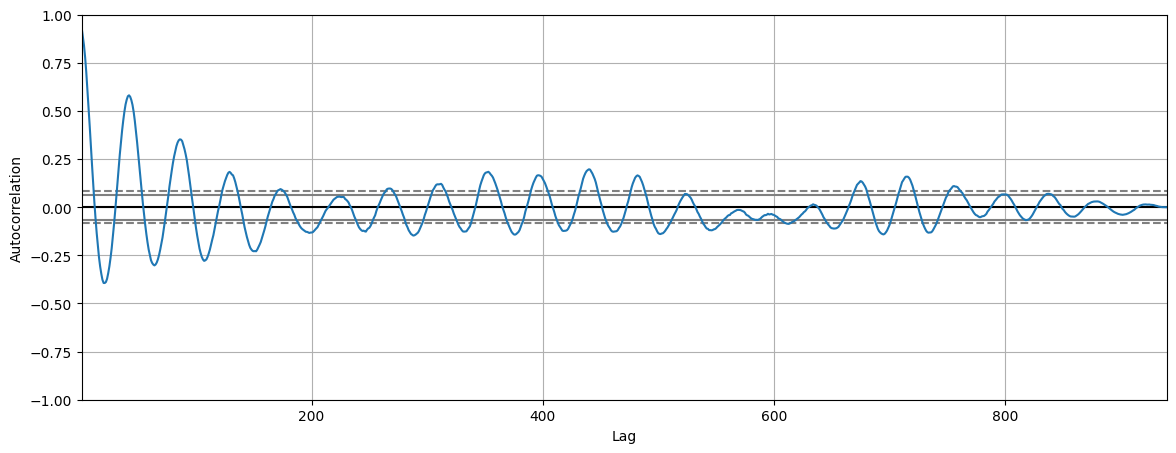

In [28]:
fig=plt.figure(figsize=(14,5))
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(data_q)
plt.show()

In [29]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as smi

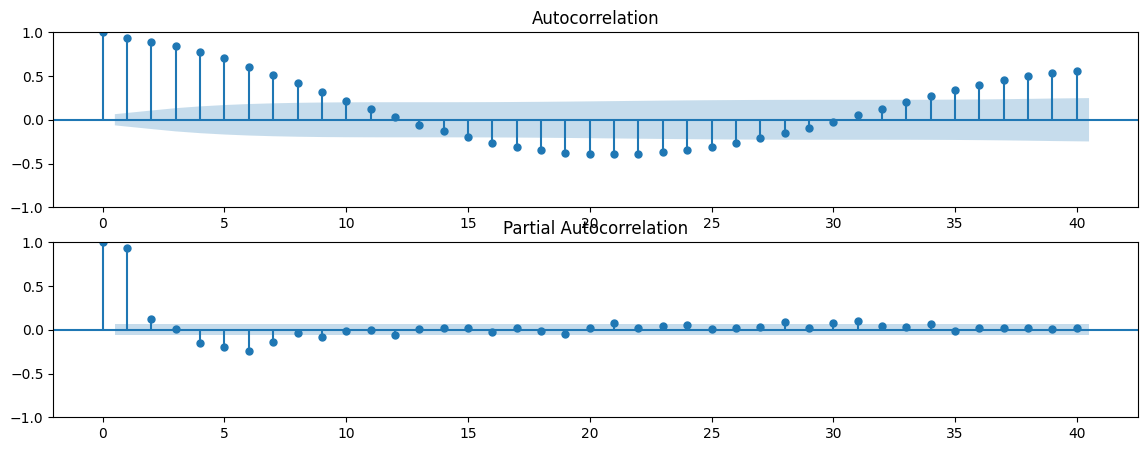

In [33]:
fig=plt.figure(figsize=(14,5))
ax1=fig.add_subplot(211)
fig=smi.graphics.tsa.plot_acf(data_q,lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=smi.graphics.tsa.plot_pacf(data_q,lags=40,ax=ax2)

In [35]:
from statsmodels.tsa.arima_model import ARIMA

In [37]:
model=smi.tsa.statespace.SARIMAX(data_q['Sunspots'],order=(2,0,2),seasonal_order=(2,0,2,6))
results=model.fit()

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [38]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Sunspots   No. Observations:                  940
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 6)   Log Likelihood               -3859.946
Date:                           Thu, 20 Mar 2025   AIC                           7737.892
Time:                                   11:58:22   BIC                           7781.505
Sample:                               03-31-1749   HQIC                          7754.518
                                    - 12-31-1983                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7901      0.077     23.329      0.000       1.640       1.940
ar.L2         -0.7915      0.077    -10.293      0.000      -0.942      -0.641
ma.L1         -1.1073      0.074    -15.033      0.000      -1.252      -0.963
ma.L2          0.3430      0.025     13.724      0.000       0.294       0.392
ar.S.L6        1.2738      0.043     29.759      0.000       1.190       1.358
ar.S.L12      -0.9223      0.043    -21.498      0.000      -1.006      -0.838
ma.S.L6       -1.2808      0.052    -24.495      0.000      -1.383      -1.178
ma.S.L12       0.8766      0.051     17.210      0.000       0.777       0.976
sigma2       214.6888      7.308     29.378      0.000     200.366     229.012
===================================================================================
Ljung-Box (L1) (Q):                   2.03   Jarque-Bera (JB):               129.44
Prob(Q):                              0.15   Prob(JB):                         0.00
Heteroskedasticity (H):               1.64   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<Axes: xlabel='Month'>

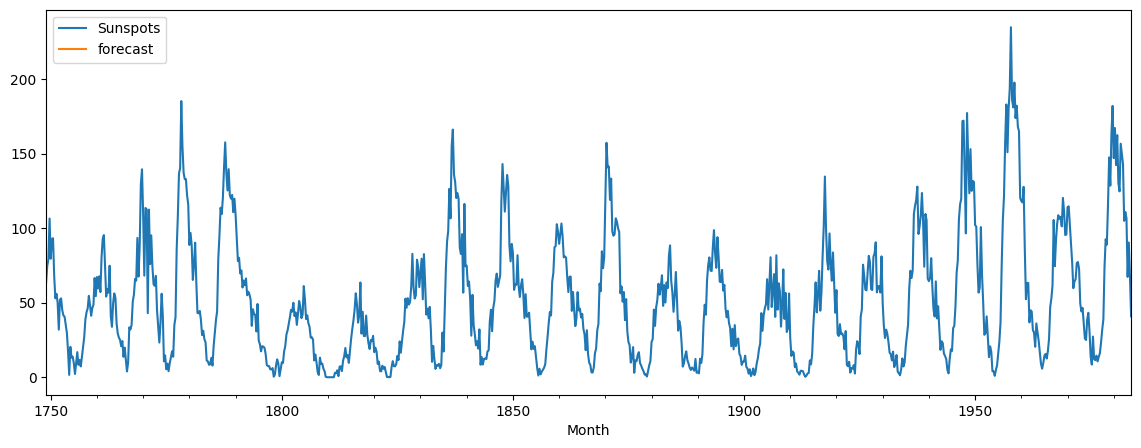

In [39]:
data_q['forecast']=results.predict(start=1000,end=1084,dynamic=True)
data_q[['Sunspots','forecast']].plot(figsize=(14,5))